## Dinesh Rajan R A
### 20CSEG06
#### 2nd M.Sc Data Analytics

In [116]:
print(current_time)
print(today)

23:35:49
2021-12-13


# Heart Disease 

In [1]:
pwd

'C:\\Users\\DELL\\ML rough\\Project_Seminar'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Loading the dataset

In [3]:
df = pd.read_csv('heart_disease.csv')
print('The Shape of the data is {}'.format(df.shape))
#print('Columns {}'.format(df.columns))

The Shape of the data is (303, 14)


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# from this we find that there are no missing values

## Categorical variables

In [8]:
cat = [feature for feature in df if df[feature].nunique() < 10]

In [9]:
df[cat].head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [10]:
category = df[cat].astype('object')

In [11]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      303 non-null    object
 1   cp       303 non-null    object
 2   fbs      303 non-null    object
 3   restecg  303 non-null    object
 4   exang    303 non-null    object
 5   slope    303 non-null    object
 6   ca       303 non-null    object
 7   thal     303 non-null    object
 8   target   303 non-null    object
dtypes: object(9)
memory usage: 21.4+ KB


In [12]:
category.describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [ ]:
#for i in category.columns:
 #   print(category[i].value_counts())

### count plots

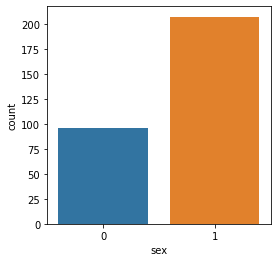

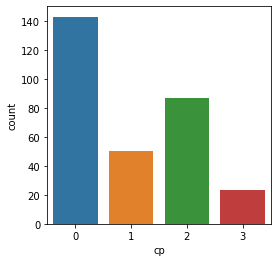

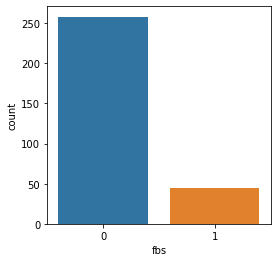

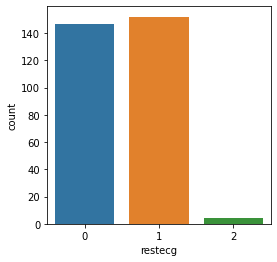

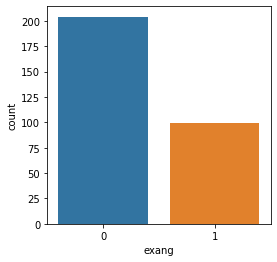

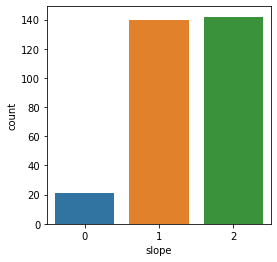

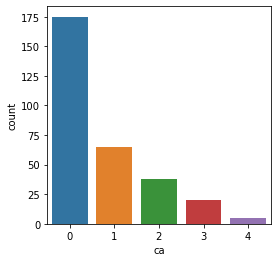

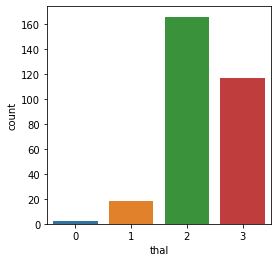

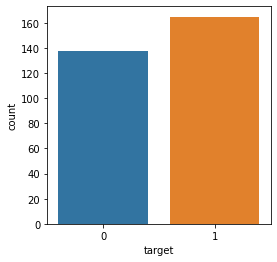

In [13]:
for i in category.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=category[i])

# Numerical features

In [14]:
numerical = [feature for feature in df if df[feature].nunique() > 10]
df[numerical].head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


## Histogram analysis

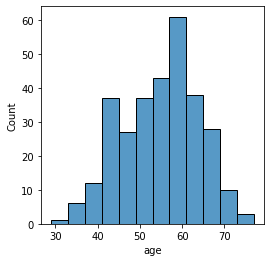

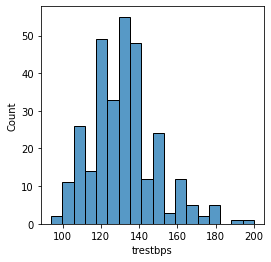

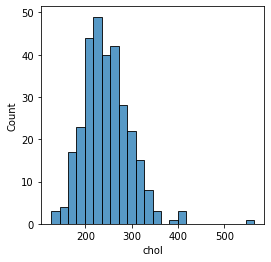

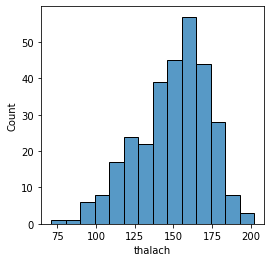

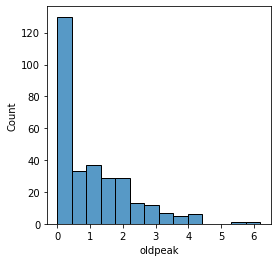

In [15]:
num_df = df[numerical]
for i in numerical:
    plt.figure(figsize=(4,4))
    sns.histplot(data=num_df[i])

In [16]:
num_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [17]:
## from Histogram and the descriptive statistics we find that the variables are almost normally disributed.

In [18]:
num_df.std() ## standard deviation

age          9.082101
trestbps    17.538143
chol        51.830751
thalach     22.905161
oldpeak      1.161075
dtype: float64

In [19]:
num_df.mean() - num_df.std()*3 

age         27.120034
trestbps    79.009334
chol        90.771773
thalach     80.931381
oldpeak     -2.443621
dtype: float64

In [20]:
num_df.mean() + num_df.std()*3

age          81.612640
trestbps    184.238191
chol        401.756279
thalach     218.362348
oldpeak       4.522829
dtype: float64

### Measure of Deviation

* 99.7% data belonging to the `AGE` variable lies between 27 to 81 with 9 standard deviation.
* 99.7% data belonging to the `trestbps` variable lies between 79 to 184 with 17.53 standard deviation.
* 99.7% data belonging to the `chol` variable lies between 90 to 401 with 51.83 standard deviation.
* 99.7% data belonging to the `thalach` variable lies between 80 to 218 with 22.90 standard deviation.
* 99.7% data belonging to the `oldpeak` variable lies between -2 to 4 with 1.16 standard deviation.


### From this we infer that any values above/below this range can be considered as an outliers.

### Multivariate Analysis

#### Scatter plot analysis

In [47]:
num_df['class'] = df['target']
num_df.shape

<ipython-input-47-f635b3e53b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_df['class'] = df['target']


(303, 6)

<AxesSubplot:>

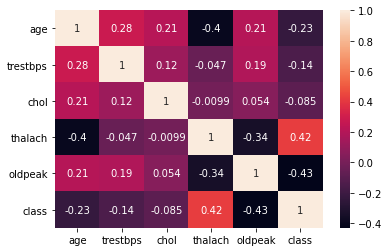

In [48]:
sns.heatmap(num_df.corr(),annot=True)

<Figure size 288x288 with 0 Axes>

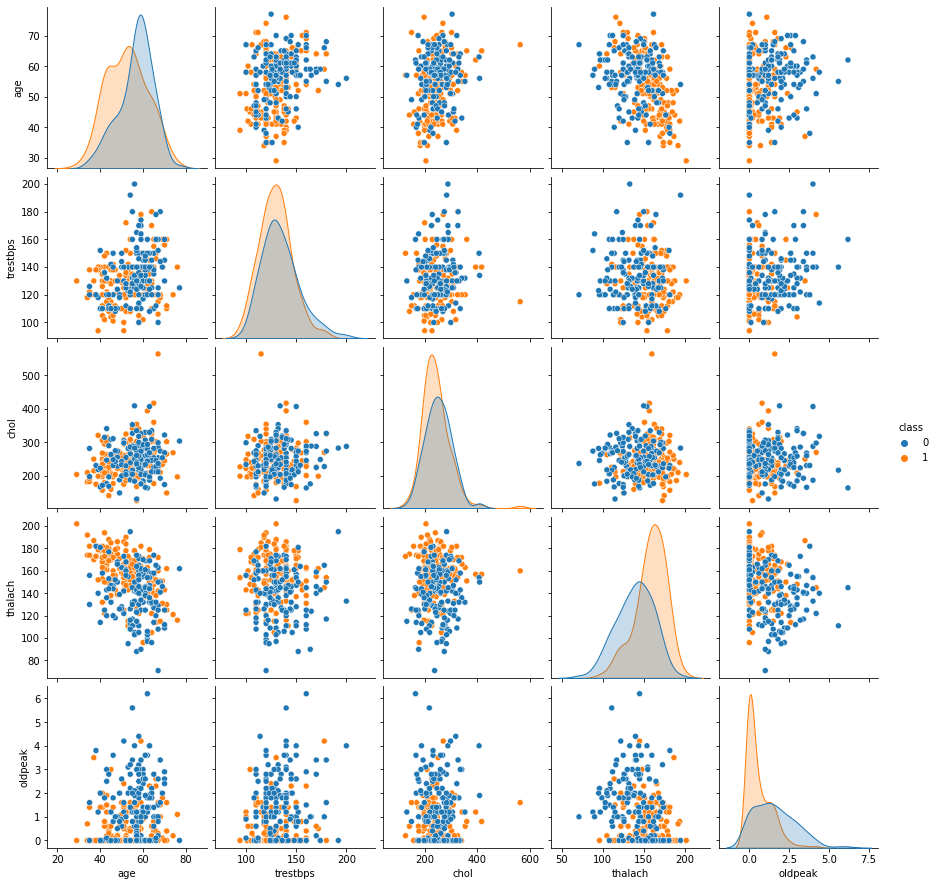

In [49]:
## From the above heat map we prove that there is no correlation between any numerical variables
##Pair plot 
plt.figure(figsize=(4,4))
sns.pairplot(num_df,hue='class')


## Outlier detection

### Box plot

In [50]:
num_df = num_df.drop(columns='class')

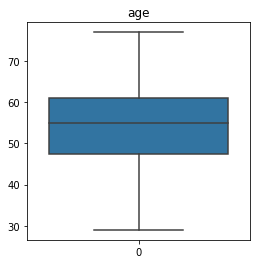

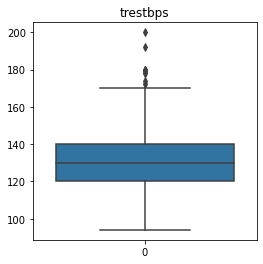

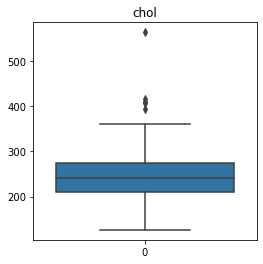

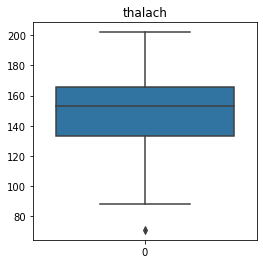

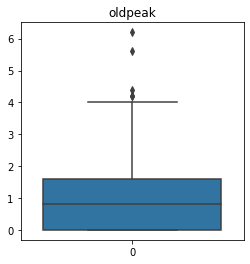

In [33]:
for i in numerical:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=num_df[i])
    plt.title(i)

In [41]:
# there are no outliers in Age variable
[df['trestbps'] < 184.23]

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 298    True
 299    True
 300    True
 301    True
 302    True
 Name: trestbps, Length: 303, dtype: bool]

In [42]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1

df_out = df[((df[numerical] < (Q1 - 1.5 * IQR)) |(df[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
print('The shape of the Outliers data is {}'.format(df_out.shape))

The shape of the Outliers data is (19, 14)


In [44]:
df_out

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [45]:
data = df[~((df[numerical] < (Q1 - 1.5 * IQR)) |(df[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(284, 14)

# Machine Learning Models

In [51]:
X = data.values[:,:-1]
y = data.values[:,-1]

In [52]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss = StandardScaler()
ss_X = ss.fit_transform(X)

In [56]:
from sklearn.model_selection import train_test_split

In [60]:
ss_X

array([[ 0.98485688,  0.65355618,  1.95306435, ..., -2.39022108,
        -0.70682254, -2.1294813 ],
       [-1.85806071,  0.65355618,  0.98166282, ..., -2.39022108,
        -0.70682254, -0.48607725],
       [-1.42068877, -1.53009035,  0.01026128, ...,  0.95373353,
        -0.70682254, -0.48607725],
       ...,
       [ 1.5315718 ,  0.65355618, -0.96114025, ..., -0.71824377,
         1.29056653,  1.15732679],
       [ 0.32879897,  0.65355618, -0.96114025, ..., -0.71824377,
         0.29187199,  1.15732679],
       [ 0.32879897, -1.53009035,  0.01026128, ..., -0.71824377,
         0.29187199, -0.48607725]])

In [72]:
cols = list(data.columns)


In [73]:
cols.remove('target')

In [75]:
print(cols)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [76]:
x = pd.DataFrame(ss_X,columns=cols)

In [77]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.984857,0.653556,1.953064,0.983507,-0.203189,2.469818,-1.022108,-0.001865,-0.681115,1.319305,-2.390221,-0.706823,-2.129481
1,-1.858061,0.653556,0.981663,0.005738,0.177337,-0.404888,0.926071,1.631492,-0.681115,2.490799,-2.390221,-0.706823,-0.486077
2,-1.420689,-1.530090,0.010261,0.005738,-0.852322,-0.404888,-1.022108,0.969320,-0.681115,0.440685,0.953734,-0.706823,-0.486077
3,0.219456,0.653556,0.010261,-0.646108,-0.136037,-0.404888,0.926071,1.234189,-0.681115,-0.145062,0.953734,-0.706823,-0.486077
4,0.328799,-1.530090,-0.961140,-0.646108,2.505263,-0.404888,0.926071,0.572017,1.468181,-0.340311,0.953734,-0.706823,-0.486077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.328799,-1.530090,-0.961140,0.657584,-0.024118,-0.404888,0.926071,-1.193775,1.468181,-0.730809,-0.718244,-0.706823,1.157327
280,-0.983317,0.653556,1.953064,-1.297953,0.490712,-0.404888,0.926071,-0.796472,-0.681115,0.245436,-0.718244,-0.706823,1.157327
281,1.531572,0.653556,-0.961140,0.918322,-1.098545,2.469818,0.926071,-0.399168,-0.681115,2.393175,-0.718244,1.290567,1.157327
282,0.328799,0.653556,-0.961140,0.005738,-2.486347,-0.404888,0.926071,-1.546933,1.468181,0.245436,-0.718244,0.291872,1.157327


In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## KNeighbors Classifier 

In [81]:
scores = []
k_range = range(1,15)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [82]:
for i,s in enumerate(scores):
    print(i+1,s)

1 0.7543859649122807
2 0.7719298245614035
3 0.8596491228070176
4 0.8771929824561403
5 0.8596491228070176
6 0.8596491228070176
7 0.8596491228070176
8 0.8421052631578947
9 0.8596491228070176
10 0.8421052631578947
11 0.8596491228070176
12 0.8596491228070176
13 0.8596491228070176
14 0.8596491228070176


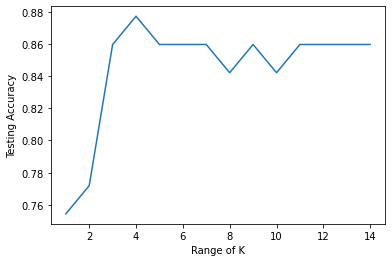

In [83]:
plt.plot(k_range,scores)
plt.xlabel('Range of K')
plt.ylabel('Testing Accuracy')
plt.show()

In [84]:
## From this we find that when the value of K is 4, we have high accuracy

In [85]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The training accuracy for K = 4 is {}'.format(accuracy_score(y_train, knn.predict(X_train))))
print("The testing accuracy for K= 4 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K = 4 is 0.8634361233480177
The testing accuracy for K= 4 is 0.8771929824561403


In [86]:
confusion_matrix(y_test, y_pred)

array([[28,  1],
       [ 6, 22]], dtype=int64)

In [90]:
#ROC CURVE
from sklearn.metrics import roc_curve
threshold = 0.4
scores = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr)
print(tpr)

[0.         0.03448276 0.03448276 0.27586207 0.44827586 1.        ]
[0.         0.46428571 0.78571429 0.82142857 0.96428571 1.        ]


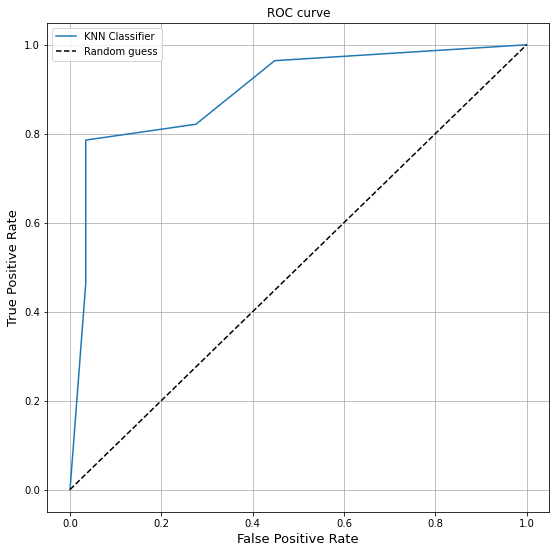

In [88]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'KNN Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend()

# Decision Tree Classifier

In [92]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('The training accuracy for DecisionTreeClassifier is {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print("The testing accuracy for DecisionTreeClassifier is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for DecisionTreeClassifier is 1.0
The testing accuracy for DecisionTreeClassifier is 0.8070175438596491


In [93]:
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 6, 22]], dtype=int64)

In [94]:
threshold = 0.4
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr)
print(tpr)

[0.         0.17241379 1.        ]
[0.         0.78571429 1.        ]


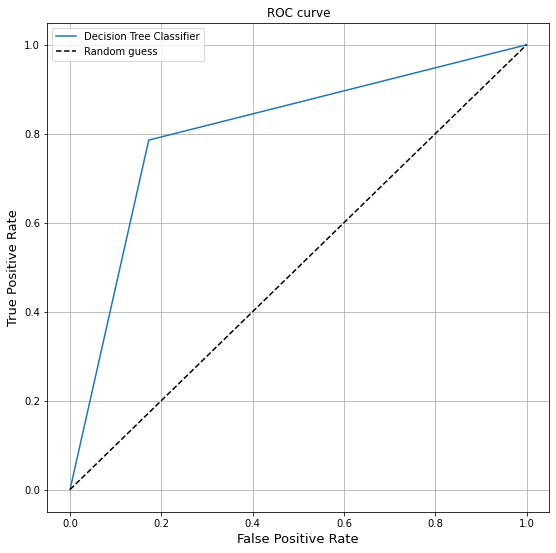

In [95]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Decision Tree Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend()

# Random Forest Classifier

In [96]:
rf = RandomForestClassifier(n_estimators = 10000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [97]:
print('The training accuracy for RandomForesteClassifier is {}'.format(accuracy_score(y_train, rf.predict(X_train))))
print("The testing accuracy for RandomForesteClassifier is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for RandomForesteClassifier is 1.0
The testing accuracy for RandomForesteClassifier is 0.8771929824561403


In [98]:
## Hyper Parameter Tuning using GridSearch
from sklearn.model_selection import GridSearchCV

In [99]:
random_forest_grid = {'max_depth': [3, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [1, 2, 4],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'n_estimators': [100, 500],
 'random_state': [1]}

In [100]:
rf_gridsearch = GridSearchCV(RandomForestClassifier(),
 random_forest_grid,
 n_jobs=-1,
 verbose=True,
 scoring='accuracy')

In [101]:
rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83246377 0.84570048 0.82801932 0.84570048
        nan        nan 0.83681159 0.84570048 0.83681159 0.84570048
        nan        nan 0.83236715 0.85014493 0.83236715 0.85014493
        nan        nan 0.83246377 0.84570048 0.82801932 0.84570048
        nan        nan 0.83681159 0.84570048 0.83681159 0.84570048
        nan        nan 0.83236715 0.85014493 0.83236715 0.85014493
        nan        nan 0.80193237 0.80628019 0.80193237 0.80628019
        nan        nan 0.80628019 0.81497585 0.80628019 0.81497585
        nan        nan 0.81497585 0.82811594 0.81497585 0.82811594
        nan        nan 0.81478261 0.82811594 0.81487923 0.83700483
        nan        nan 0.83246377 0.84135266 0.83246377 0.84135266
        nan        nan 0.83236715 0.83681159 0.83236715 0.83681159
        nan        nan 0.81478261 0.82811594 0.8148792

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 500], 'random_state': [1]},
             scoring='accuracy', verbose=True)

In [102]:
print('best parameters:', rf_gridsearch.best_params_)
print('best score:',rf_gridsearch.best_score_)

best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}
best score: 0.8544927536231883


In [103]:
best_rf_model = rf_gridsearch.best_estimator_
best_rf_model.fit(X_train, y_train)
print('Random Forest Testing Accuracy Score: {}'.format(best_rf_model.score(X_test, y_test)))

Random Forest Testing Accuracy Score: 0.8070175438596491


In [104]:
y_pred = best_rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 6, 22]], dtype=int64)

In [105]:
threshold = 0.4
scores = best_rf_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.03448276 0.03448276 0.06896552 0.10344828
 0.17241379 0.17241379 0.20689655 0.20689655 0.24137931 0.24137931
 0.5862069  0.65517241 0.75862069 0.86206897 1.        ]
[0.         0.03571429 0.17857143 0.32142857 0.39285714 0.46428571
 0.53571429 0.71428571 0.71428571 0.75       0.75       0.78571429
 0.78571429 0.89285714 0.89285714 0.92857143 0.92857143 0.96428571
 0.96428571 0.96428571 0.96428571 1.         1.        ]


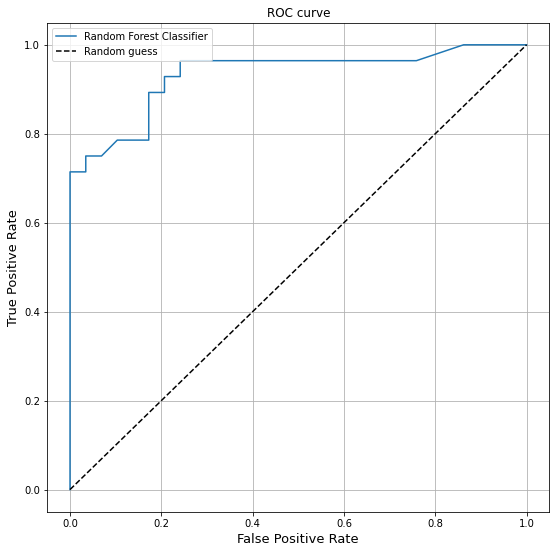

In [106]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Random Forest Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend()

# Logistic Regression 

In [108]:
logreg = LogisticRegression(C = 1e5)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [109]:
print('Accuracy of the training data is {}'.format(accuracy_score(y_train,logreg.predict(X_train))))
print('Accuracy of the testing data is {}'.format(accuracy_score(y_test,y_pred)))

Accuracy of the training data is 0.8502202643171806
Accuracy of the testing data is 0.8245614035087719


In [110]:
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 5, 23]], dtype=int64)

In [111]:
threshold = 0.4
scores = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr)
print(tpr)

[0.         0.         0.         0.03448276 0.03448276 0.13793103
 0.13793103 0.17241379 0.17241379 0.20689655 0.20689655 0.51724138
 0.51724138 1.        ]
[0.         0.03571429 0.75       0.75       0.78571429 0.78571429
 0.82142857 0.82142857 0.85714286 0.85714286 0.96428571 0.96428571
 1.         1.        ]


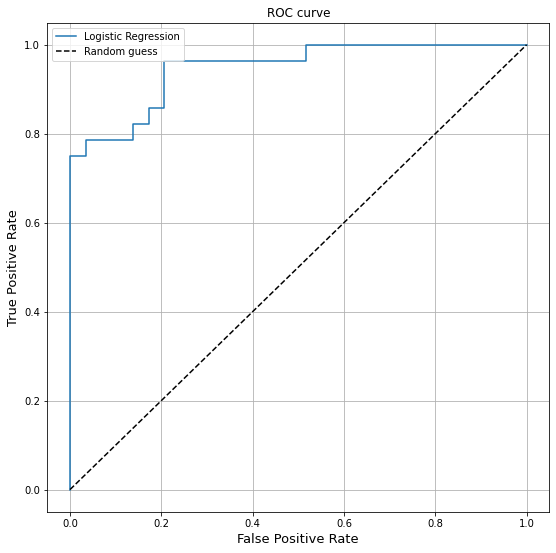

In [112]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Logistic Regression')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend()

# Comparing the Test accuracy of the models that we have used 
1. The testing accuracy for K= 4 is 0.8771929824561403  (KN Classifier)
2. The testing accuracy for DecisionTreeClassifier is 0.8070175438596491
3. The testing accuracy for RandomForesteClassifier is 0.8771929824561403
4. Accuracy of the testing data is 0.8245614035087719 ( Logistic Regression)
# we use the KN Classifier model for this dataset.